In order to determine where the duplicates are coming from, here we compare the plots of the data that is duplicated and not duplicated. It appears that the duplicate entries occurs on weekdays right after peak traffic times and that they are close together to each other in time.

In [1]:
def quertyTripsDuplicate(dbPath):
	import sqlite3

	db = sqlite3.connect(dbPath)
	cursor = db.cursor()

	cursor.execute('''SELECT startTime, bridgeName, direction, simpleMPH, tripid FROM tripsNonzero GROUP BY simpleMPH, startTime HAVING COUNT(*) > 1''')
	result = cursor.fetchall()

	db.close()
	return result

In [2]:
def quertyTripsNonDuplicate(dbPath):
	import sqlite3

	db = sqlite3.connect(dbPath)
	cursor = db.cursor()

	cursor.execute('''SELECT startTime, bridgeName, direction, simpleMPH, tripid FROM tripsNonzero GROUP BY simpleMPH, startTime HAVING COUNT(*) == 1''')
	result = cursor.fetchall()

	db.close()
	return result

In [3]:
import pandas as pd
import datetime as dt
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.style as style
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import datetime as dt
%matplotlib inline


In [4]:
style.use('seaborn-ticks')

In [5]:
cbColors = [ [86,180,233], [230,159,0], [0,158,115], [240,228,66], [0,114,178],  [213,94,0], [204,121,167], [0,0,0],]
for rgbList in cbColors:
    rgbList[:] = [x / 255 for x in rgbList]
mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color=cbColors)

In [6]:
DB_PATH = 'archives/mydb_Aug13_Final'
rowsNonDupe = quertyTripsNonDuplicate(DB_PATH)
rowsDupe = quertyTripsDuplicate(DB_PATH)

In [7]:
formattedRows = [[dt.datetime.fromtimestamp(int(list[0])), list[1], list[2], float(list[3]), list[4]]  for list in rowsNonDupe]
df_NonDupe = pd.DataFrame(formattedRows, columns=['datetime','highway','direction','simpleMPH', 'tripid'])
formattedRows2 = [[dt.datetime.fromtimestamp(int(list[0])), list[1], list[2], float(list[3]), list[4]]  for list in rowsDupe]
df_Dupe = pd.DataFrame(formattedRows2, columns=['datetime','highway','direction','simpleMPH', 'tripid'])

In [9]:
df_Dupe = df_Dupe.loc[df_Dupe['simpleMPH'] <= 75] #Remove spurious data
df_Dupe = df_Dupe.sort('datetime')
df_Dupe['date'] = df_Dupe['datetime'].apply(lambda x: x.date)
from pandas import date_range, to_datetime
df_Dupe['timeofdaysec'] = df_Dupe['datetime'].apply(lambda x: (to_datetime(x) -to_datetime(x.date())).total_seconds())

In [10]:
df_NonDupe = df_NonDupe.loc[df_NonDupe['simpleMPH'] <= 75] #Remove spurious data
df_NonDupe = df_NonDupe.sort('datetime')
df_NonDupe['date'] = df_NonDupe['datetime'].apply(lambda x: x.date)
from pandas import date_range, to_datetime
df_NonDupe['timeofdaysec'] = df_NonDupe['datetime'].apply(lambda x: (to_datetime(x) -to_datetime(x.date())).total_seconds())

In [11]:
df_DupeWI90 = df_Dupe.loc[(df_Dupe['highway'] == 'I90') & (df_Dupe['direction'] == 'W')]
df_DupeEI90 = df_Dupe.loc[(df_Dupe['highway'] == 'I90') & (df_Dupe['direction'] == 'E')]
df_DupeWSR520 = df_Dupe.loc[(df_Dupe['highway'] == 'SR520') & (df_Dupe['direction'] == 'W')]
df_DupeESR520 = df_Dupe.loc[(df_Dupe['highway'] == 'SR520') & (df_Dupe['direction'] == 'E')]

In [12]:
df_NonDupeWI90 = df_NonDupe.loc[(df_NonDupe['highway'] == 'I90') & (df_NonDupe['direction'] == 'W')]
df_NonDupeEI90 = df_NonDupe.loc[(df_NonDupe['highway'] == 'I90') & (df_NonDupe['direction'] == 'E')]
df_NonDupeWSR520 = df_NonDupe.loc[(df_NonDupe['highway'] == 'SR520') & (df_NonDupe['direction'] == 'W')]
df_NonDupeESR520 = df_NonDupe.loc[(df_NonDupe['highway'] == 'SR520') & (df_NonDupe['direction'] == 'E')]

First we check if the difference between the simpleMPH of the duplicate and nonduplicate entries. If it were the case that these were simply scheduled routes it may be that the duplicate entries are much faster since they might not be slowed down by traffic. The two sets of data look very similar so we don't get any conclusion from this.

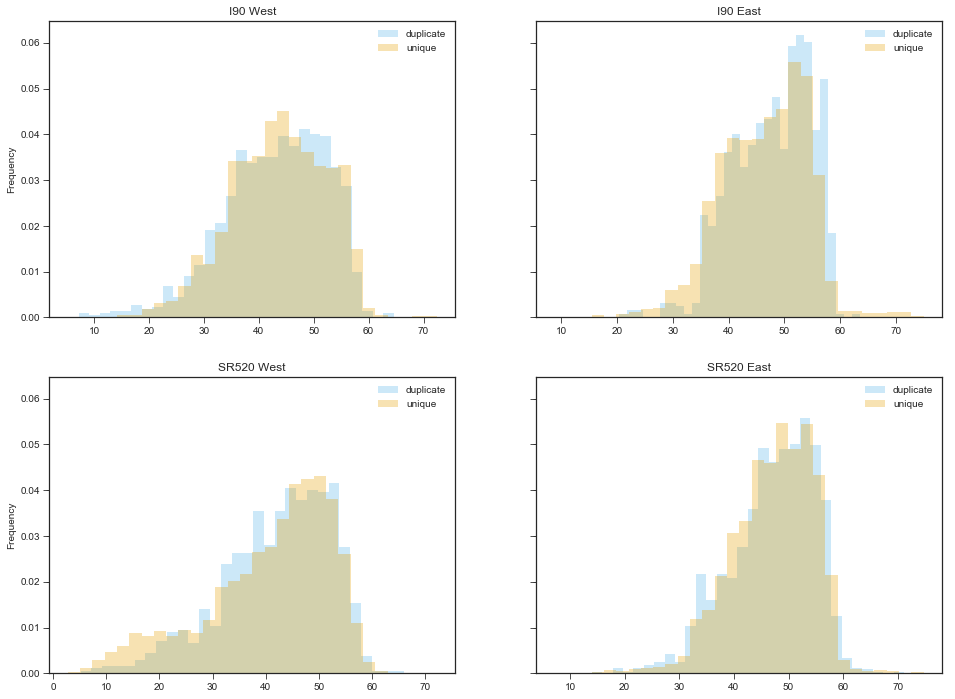

In [32]:
kind='hist'
options={'bins':30, 'normed':True, 'alpha':.3}
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(16,12), sharex=False, sharey=True)

df_DupeWI90.plot(ax=ax1, kind=kind, x='date', y='simpleMPH', label='duplicate', **options)
df_NonDupeWI90.plot(ax=ax1, kind=kind, x='date', y='simpleMPH', label='unique', **options)
ax1.set_title('I90 West')

df_DupeEI90.plot(ax=ax2, kind=kind, x='date', y='simpleMPH', label='duplicate', **options)
df_NonDupeEI90.plot(ax=ax2, kind=kind, x='date', y='simpleMPH', label='unique', **options)
ax2.set_title('I90 East')

df_DupeWSR520.plot(ax=ax3, kind=kind, x='date', y='simpleMPH', label='duplicate', **options)
df_NonDupeWSR520.plot(ax=ax3, kind=kind, x='date', y='simpleMPH', label='unique', **options)
ax3.set_title('SR520 West')

df_DupeESR520.plot(ax=ax4, kind=kind, x='date', y='simpleMPH', label='duplicate', **options)
df_NonDupeESR520.plot(ax=ax4, kind=kind, x='date', y='simpleMPH', label='unique', **options)
ax4.set_title('SR520 East')

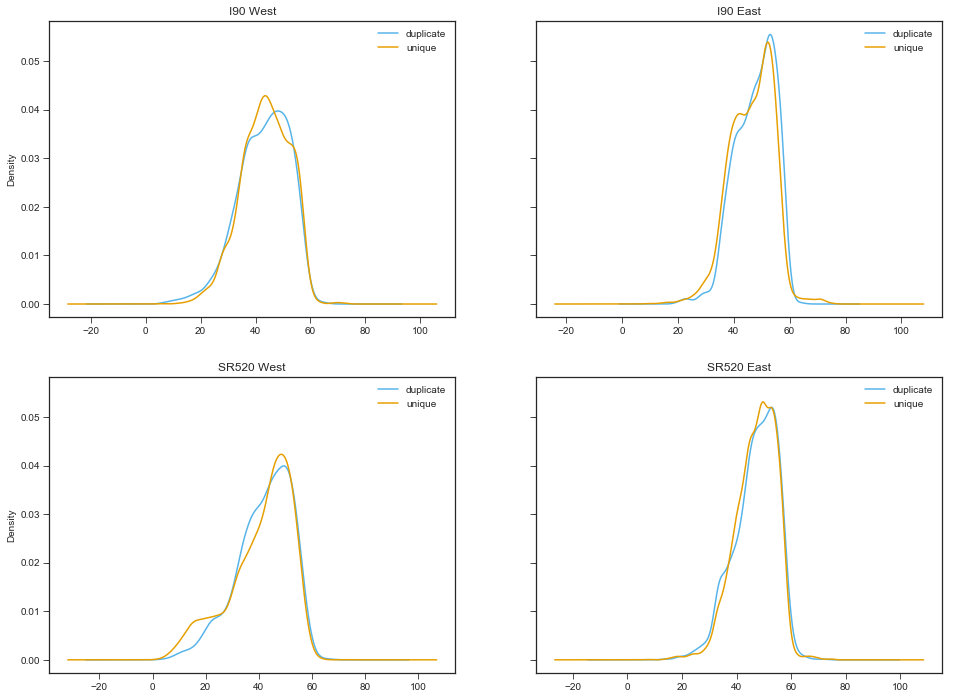

In [33]:
kind='kde'
options={ 'alpha':1}
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(16,12), sharex=False, sharey=True)

df_DupeWI90.plot(ax=ax1, kind=kind, x='date', y='simpleMPH', label='duplicate', **options)
df_NonDupeWI90.plot(ax=ax1, kind=kind, x='date', y='simpleMPH', label='unique', **options)
ax1.set_title('I90 West')

df_DupeEI90.plot(ax=ax2, kind=kind, x='date', y='simpleMPH', label='duplicate', **options)
df_NonDupeEI90.plot(ax=ax2, kind=kind, x='date', y='simpleMPH', label='unique', **options)
ax2.set_title('I90 East')

df_DupeWSR520.plot(ax=ax3, kind=kind, x='date', y='simpleMPH', label='duplicate', **options)
df_NonDupeWSR520.plot(ax=ax3, kind=kind, x='date', y='simpleMPH', label='unique', **options)
ax3.set_title('SR520 West')

df_DupeESR520.plot(ax=ax4, kind=kind, x='date', y='simpleMPH', label='duplicate', **options)
df_NonDupeESR520.plot(ax=ax4, kind=kind, x='date', y='simpleMPH', label='unique', **options)
ax4.set_title('SR520 East')

Next we will check the difference between the indexes in the database of the matching entries.

In [35]:
def queryDatapointsCorrespondingId(dbPath, myIndex):
    import sqlite3

    db = sqlite3.connect(dbPath)
    cursor = db.cursor()
    
    query = "SELECT time, realLat, realLon FROM datapoints WHERE correspondingTripId = ?"
    cursor.execute(query,(myIndex,))
    
    result = cursor.fetchall()
    
    db.close()
    return result

In [36]:
def queryDatapointsDuplicate(dbPath, time, lat, lon):
    import sqlite3

    db = sqlite3.connect(dbPath)
    cursor = db.cursor()

    cursor.execute('''SELECT correspondingTripId FROM datapoints WHERE time == ? AND realLat == ? AND realLon == ?''', (time,lat,lon))
    result = cursor.fetchall()

    db.close()
    return result

Here we only look at a subset of entries since this operation grows as n increases.

In [37]:
remainingDupeIndexes = df_Dupe['tripid'].tolist()
diffList = []
for tripid in remainingDupeIndexes[:300]:
    indexToPlot=int(tripid)
    myRows=queryDatapointsCorrespondingId(DB_PATH, indexToPlot)
    pointToMatch = myRows[0]
    matches = queryDatapointsDuplicate(DB_PATH, pointToMatch[0], pointToMatch[1], pointToMatch[2])
    matches = [a[0] for a in matches]
    matches.sort()
    diffList+= [a - matches[0] for a in matches][1:]
    for a in matches:
        if a in remainingDupeIndexes: remainingDupeIndexes.remove(a)


In [43]:
df_diff = pd.DataFrame({'deltaindex':diffList})

From the histogram we can see that the occurrence of matching entries rapidly decays as the index increases. This suggest that the duplicates are not from a schedule, since we would expect to see duplicate entries farther apart from each other.

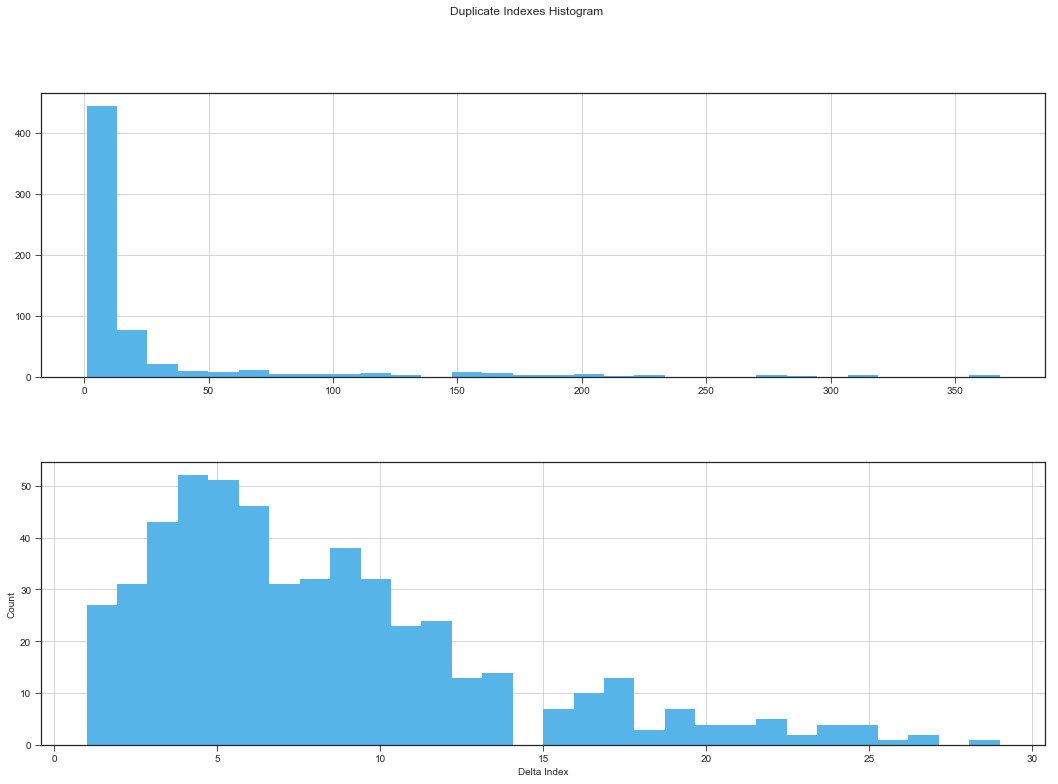

In [63]:
fig, (ax1, ax2) = plt.subplots(2, figsize=(18,12), )
df_diff.hist(ax=ax1, bins=30)
df_diff.loc[df_diff['deltaindex'].abs() < 30].hist(ax=ax2,bins=30)
ax1.set_title('')
ax2.set_title('')
plt.xlabel('Delta Index')
plt.ylabel('Count')
plt.suptitle('Duplicate Indexes Histogram')

Next we look at all of the duplicate entries vs time to see if there is any relationship. Surprisingly there are no duplicates on the weekends. The reason for this is still not known.

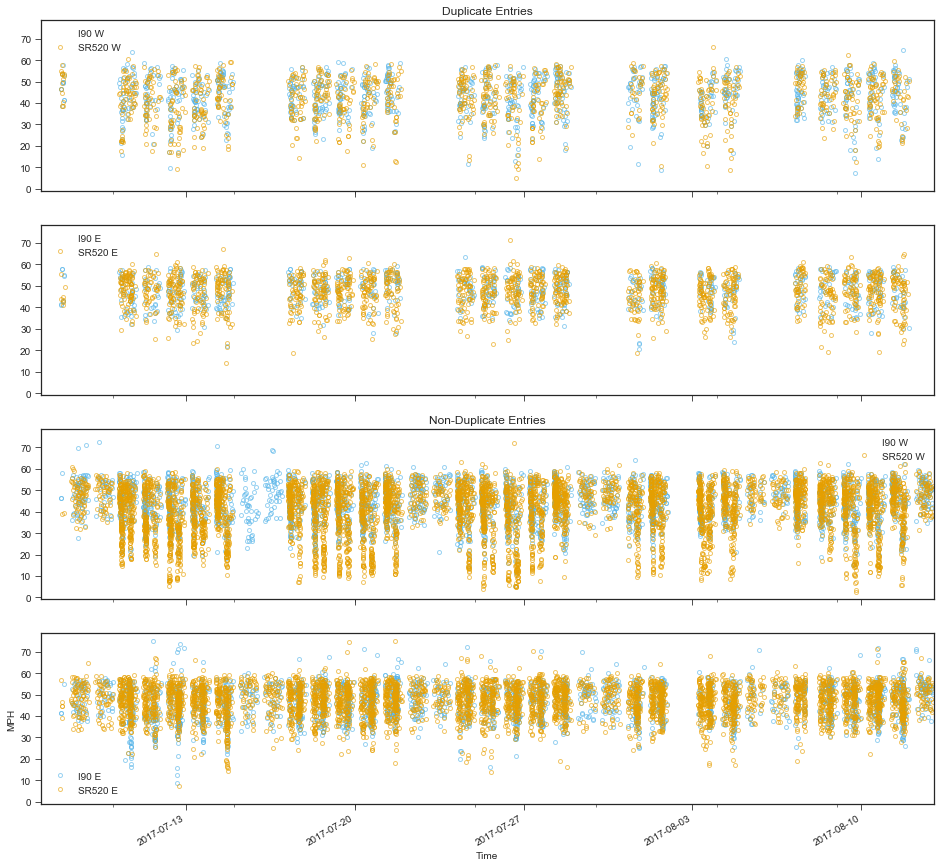

In [77]:
kwargs = {'lw':0, 'marker':'o', 'markersize':4, 'alpha':.6, 'mfc':'none'}
start=dt.date(2017,7,7)
end=dt.date(2017,8,13)
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, figsize=(16,16), sharex=True, sharey=True)

df_DupeWI90.plot(ax=ax1, x='datetime', y='simpleMPH', label='I90 W', **kwargs)
df_DupeWSR520.plot(ax=ax1, x='datetime', y='simpleMPH', label='SR520 W', **kwargs)
plt.xlim(start,end)
plt.legend(['I90 W', 'SR520 W'])
ax1.set_title('Duplicate Entries')

df_DupeEI90.plot(ax=ax2, x='datetime', y='simpleMPH', label='I90 E', **kwargs)
df_DupeESR520.plot(ax=ax2, x='datetime', y='simpleMPH', label='SR520 E', **kwargs)
plt.xlim(start,end)
plt.legend(['I90 E', 'SR520 E'])
plt.ylabel('MPH')
plt.xlabel('Time')


df_NonDupeWI90.plot(ax=ax3, x='datetime', y='simpleMPH', label='I90 W', **kwargs)
df_NonDupeWSR520.plot(ax=ax3, x='datetime', y='simpleMPH', label='SR520 W', **kwargs)
plt.xlim(start,end)
plt.legend(['I90 W', 'SR520 W'])
ax3.set_title('Non-Duplicate Entries')

df_NonDupeEI90.plot(ax=ax4, x='datetime', y='simpleMPH', label='I90 E', **kwargs)
df_NonDupeESR520.plot(ax=ax4, x='datetime', y='simpleMPH', label='SR520 E', **kwargs)
plt.xlim(start,end)
plt.legend(['I90 E', 'SR520 E'])
plt.ylabel('MPH')
plt.xlabel('Time')


Here we are looking to see if the duplicates occur at any specific time of day. It appears that the duplicate entries are much more likely to occur right after the morning and evening rush hours. To see this we look at the un-normed and normed histograms of the two data sets in relation to the time of day.

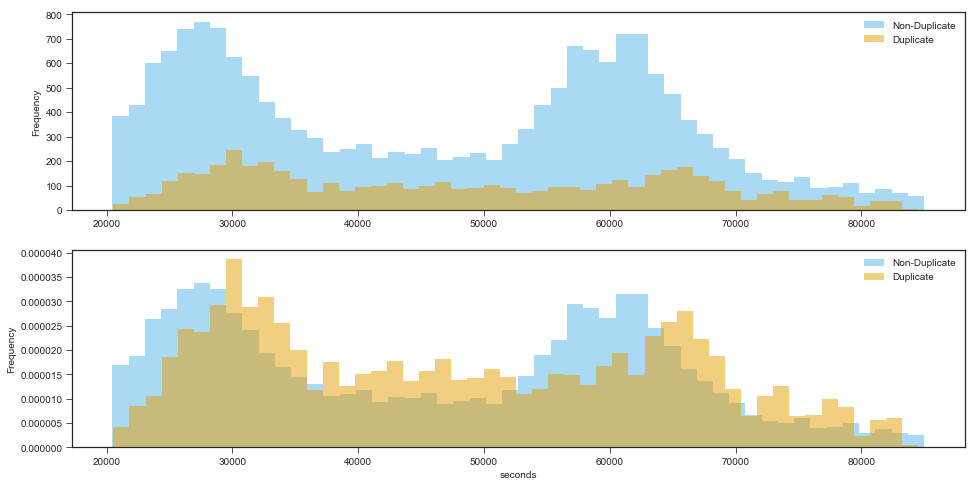

In [88]:
kwargs={'bins':50, 'alpha':.5, 'normed':False}
fig, (ax1, ax2) = plt.subplots(2, figsize=(16,8))
df_NonDupe.plot(ax=ax1, kind='hist', y='timeofdaysec', label='Non-Duplicate', **kwargs)
df_Dupe.plot(ax=ax1, kind='hist', y='timeofdaysec', label='Duplicate', **kwargs)
plt.xlabel('seconds')
plt.title('')

kwargs={'bins':50, 'alpha':.5, 'normed':True}
df_NonDupe.plot(ax=ax2, kind='hist', y='timeofdaysec', label='Non-Duplicate', **kwargs)
df_Dupe.plot(ax=ax2, kind='hist', y='timeofdaysec', label='Duplicate', **kwargs)
plt.xlabel('seconds')
plt.title('')

Here we are checking to see if perhaps there are more duplicates in a certain direction. There are relatively more duplicates going East but the difference is small.

In [126]:
def directionToInt(x):
    if (x=='W'):
        return 0
    else:
        return 1
df_Dupe['directionint'] = df_Dupe['direction'].apply(directionToInt)
df_NonDupe['directionint'] = df_NonDupe['direction'].apply(directionToInt)

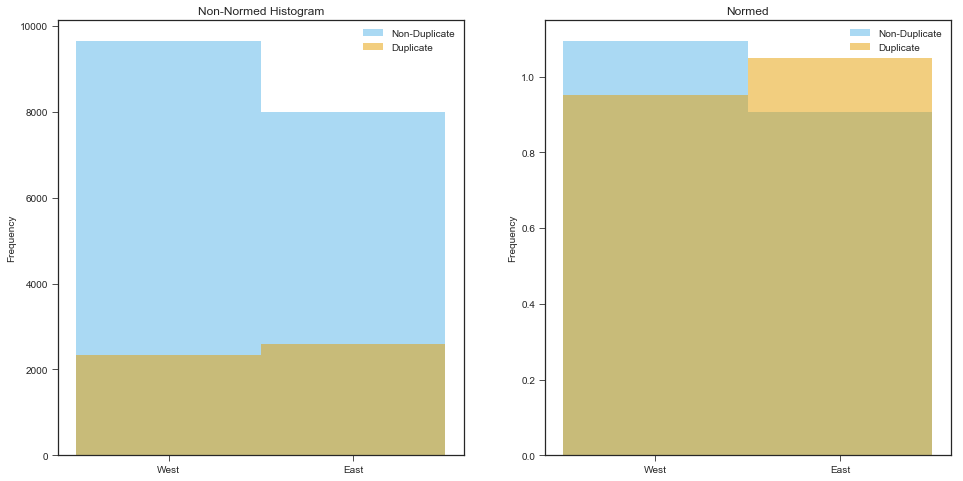

In [129]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(16,8))

kwargs={'bins':2, 'alpha':.5}
df_NonDupe.plot(ax=ax1, kind='hist', y='directionint', label='Non-Duplicate', **kwargs)
df_Dupe.plot(ax=ax1, kind='hist', y='directionint', label='Duplicate', **kwargs)
ax1.set_title('Non-Normed Histogram')
ax1.set_xticks([.25, .75])
ax1.set_xticklabels(['West', 'East'])

kwargs={'bins':2, 'alpha':.5, 'normed':True}
df_NonDupe.plot(ax=ax2, kind='hist', y='directionint', label='Non-Duplicate', **kwargs)
df_Dupe.plot(ax=ax2, kind='hist', y='directionint', label='Duplicate', **kwargs)
ax2.set_xticks([.25, .75])
ax2.set_xticklabels(['West', 'East'])
ax2.set_title('Normed')